In [ ]:
import tensorflow as tf
print("GPU Available:", tf.test.is_gpu_available())



Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


GPU Available: True


In [ ]:
!nvidia-smi

Mon Jul  7 12:53:08 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   63C    P0             30W /   70W |     102MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Load Libraries

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
# Loading Dataset Using ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile

data_dir = '/content/drive/MyDrive/Plant disease detection dataset/dataset/PlantVillage'

# zip_path = '/content/drive/MyDrive/Plant disease detection dataset/dataset.zip'
# extract_path = '/content/PlantVillage'

# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_path)



img_height, img_width = 128, 128
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

print("Classes:", train_data.class_indices)
print("Training Images:", train_data.samples)
print("Validation Images:", val_data.samples)



Found 16490 images belonging to 15 classes.
Found 4116 images belonging to 15 classes.
Classes: {'Pepper__bell___Bacterial_spot': 0, 'Pepper__bell___healthy': 1, 'Potato___Early_blight': 2, 'Potato___Late_blight': 3, 'Potato___healthy': 4, 'Tomato_Bacterial_spot': 5, 'Tomato_Early_blight': 6, 'Tomato_Late_blight': 7, 'Tomato_Leaf_Mold': 8, 'Tomato_Septoria_leaf_spot': 9, 'Tomato_Spider_mites_Two_spotted_spider_mite': 10, 'Tomato__Target_Spot': 11, 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12, 'Tomato__Tomato_mosaic_virus': 13, 'Tomato_healthy': 14}
Training Images: 16490
Validation Images: 4116


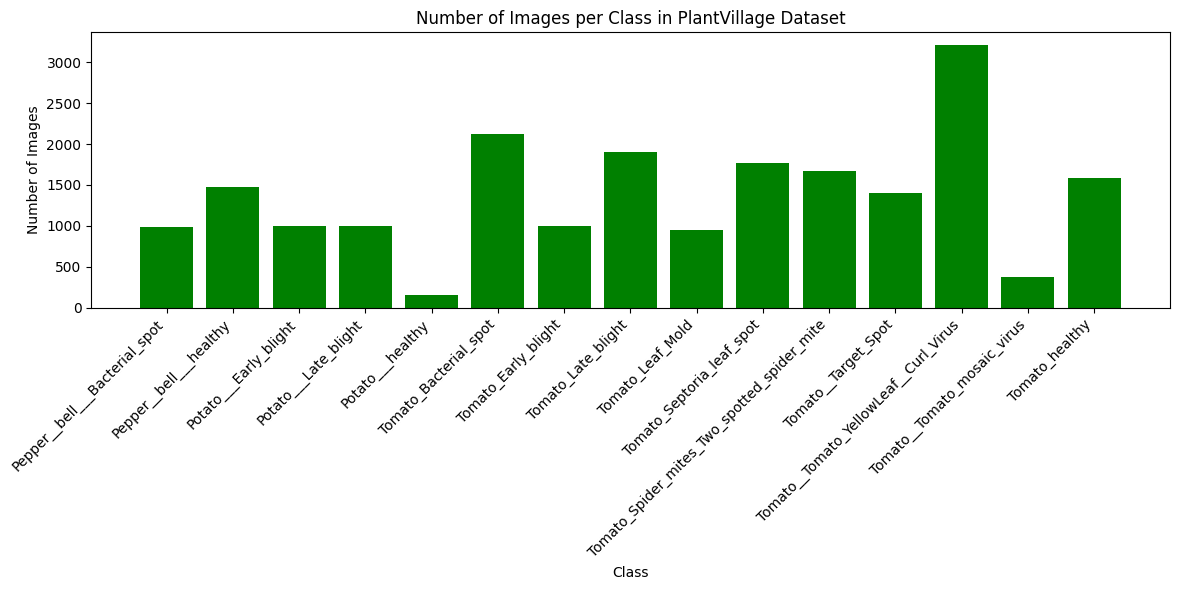

In [32]:
import matplotlib.pyplot as plt

# Get class labels and number of images per class
class_labels = list(train_data.class_indices.keys())
class_counts = [0] * len(class_labels)

import os

for idx, class_name in enumerate(class_labels):
    class_folder = os.path.join(data_dir, class_name)
    class_counts[idx] = len(os.listdir(class_folder))

# Plotting the class distribution
plt.figure(figsize=(12, 6))
plt.bar(class_labels, class_counts, color='green')
plt.xticks(rotation=45, ha='right')
plt.title('Number of Images per Class in PlantVillage Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.tight_layout()
plt.show()


In [ ]:
# building cnn model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(img_height, img_width, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax') 
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,394,255 (28.21 MB)

 Trainable params: 7,394,255 (28.21 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 7270s 14s/step - accuracy: 0.3231 - loss: 2.2213 - val_accuracy: 0.6900 - val_loss: 0.9701
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 75s 146ms/step - accuracy: 0.6743 - loss: 1.0200 - val_accuracy: 0.7988 - val_loss: 0.6067
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 74s 143ms/step - accuracy: 0.7516 - loss: 0.7438 - val_accuracy: 0.8134 - val_loss: 0.5697
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 72s 140ms/step - accuracy: 0.7973 - loss: 0.6045 - val_accuracy: 0.8542 - val_loss: 0.4326
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 79s 153ms/step - accuracy: 0.8304 - loss: 0.4969 - val_accuracy: 0.8465 - val_loss: 0.4658
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 71s 139ms/step - accuracy: 0.8500 - loss: 0.4295 - val_accuracy: 0.8656 - val_loss: 0.4151
Epoch 7/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 72s 140ms/step - accuracy: 0.8723 - loss: 0.3625 - val_accuracy: 0.8773 - val_loss: 0.3803
Epoch 8/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 79s 152ms/step - accuracy: 0.8839 - loss: 0

In [ ]:
model.save('plant_disease_model.h5')
print("✅ Model saved successfully!")


✅ Model saved successfully!


In [ ]:
loss, accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


129/129 ━━━━━━━━━━━━━━━━━━━━ 15s 117ms/step - accuracy: 0.8764 - loss: 0.4260
Validation Accuracy: 87.93%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


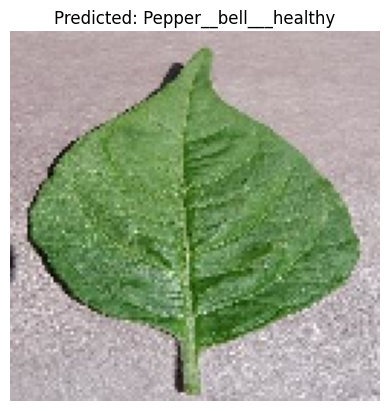

In [31]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load and preprocess the image
# img = image.load_img('/content/drive/MyDrive/Plant disease detection dataset/images.jpeg', target_size=(128, 128))
img_path = '/content/drive/MyDrive/Plant disease detection dataset/image7.JPG'
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Predict
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)
class_labels = list(train_data.class_indices.keys())

# Output
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {class_labels[predicted_class]}")
plt.show()